In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.style.use('ggplot')
import matplotlib.ticker as ticker

In [2]:
#connect to database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['Measurement', 'Station']

In [4]:
#Get Tables
Measurement = Base.classes.Measurement
Station = Base.classes.Station

In [5]:
session = Session(engine)

In [6]:
#get columns in table
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for x in columns:
    print(x['name'], x['type'])

id INTEGER
STATION VARCHAR
DATE TEXT
PRCP INTEGER
TOBS INTEGER
ISODATE DATETIME


In [39]:
columns = inspector.get_columns('Station')
for x in columns:
    print(x['name'], x['type'])

id INTEGER
STATION VARCHAR
NAME VARCHAR
LATITUDE FLOAT
LONGITUDE FLOAT
ELEVATION FLOAT


In [7]:
#get total number of dates
session.query(func.count(Measurement.DATE)).all()

[(18103)]

In [8]:
#Get last date in database:
# Latest Date
session.query(Measurement.ISODATE, Measurement.id).order_by(Measurement.ISODATE.desc()).first()

(datetime.datetime(2017, 8, 23, 0, 0), 2685)

In [9]:
#get start and end dates for trip
start = ('08/01/13')
end =  ('01/13/13')

session.query(Measurement.ISODATE, Measurement.id).filter(Measurement.ISODATE > '2015-09-09 00:00:00.000000').first()

(datetime.datetime(2015, 9, 10, 0, 0), 1979)

In [10]:
#Query 1: Precipitation Analysis
#Got sum of precipitation per month in order to have a cleaner presentation
# precipitation = session.query(Measurement.DATE, func.sum(Measurement.PRCP))\
# .filter(Measurement.ISODATE > '2016-08-22 00:00:00.000000').group_by(func.strftime('%m',Measurement.ISODATE)).\
# order_by(Measurement.ISODATE).all()

precipitation = session.query(Measurement.DATE, Measurement.PRCP)\
.filter(Measurement.ISODATE > '2016-08-22 00:00:00.000000').group_by(Measurement.ISODATE).\
order_by(Measurement.ISODATE).all()

In [11]:
precipitation

[('8/23/16', 0.7),
 ('8/24/16', 1.45),
 ('8/25/16', 0.11),
 ('8/26/16', 0.01),
 ('8/27/16', 0.12),
 ('8/28/16', 2.07),
 ('8/29/16', 0.9),
 ('8/30/16', 0.05),
 ('8/31/16', 2.46),
 ('9/1/16', 0.01),
 ('9/2/16', 0.03),
 ('9/3/16', 1),
 ('9/4/16', 0.44),
 ('9/5/16', 0.18),
 ('9/6/16', 1),
 ('9/7/16', 1.35),
 ('9/8/16', 0.15),
 ('9/9/16', 0.35),
 ('9/10/16', 1.16),
 ('9/11/16', 0.6),
 ('9/12/16', 1.04),
 ('9/13/16', 1.2),
 ('9/14/16', 6.7),
 ('9/15/16', 3.35),
 ('9/16/16', 0.61),
 ('9/17/16', 0.23),
 ('9/18/16', 0.42),
 ('9/19/16', 0.25),
 ('9/20/16', 0.43),
 ('9/21/16', 1.02),
 ('9/22/16', 0.75),
 ('9/23/16', 0.33),
 ('9/24/16', 0.27),
 ('9/25/16', 0.04),
 ('9/26/16', 1.02),
 ('9/27/16', 1),
 ('9/28/16', 0.05),
 ('9/29/16', 1.49),
 ('9/30/16', 0.38),
 ('10/1/16', 1.02),
 ('10/2/16', 0.61),
 ('10/3/16', 0.46),
 ('10/4/16', 3.46),
 ('10/5/16', 0.81),
 ('10/6/16', 0.04),
 ('10/7/16', 0.01),
 ('10/8/16', 0.04),
 ('10/9/16', 0),
 ('10/10/16', 0),
 ('10/11/16', 0.35),
 ('10/12/16', 0.02),
 ('10/

In [12]:
df = pd.DataFrame(precipitation, columns=['DATE', 'PRCP'])
df.set_index('DATE', inplace=True)
df

,PRCP
DATE,
8/23/16,0.70
8/24/16,1.45
8/25/16,0.11
8/26/16,0.01
8/27/16,0.12
8/28/16,2.07
8/29/16,0.90
8/30/16,0.05
8/31/16,2.46


In [13]:
# df.plot.bar(title="Precipitation by Date", color="#4286f4", figsize=(19,19), rot=90)
xticks = []
count = 0
for date in df.index:
    if count % 30 == 0 or count == 1:
        xticks.append(date)
    count += 1
ax = df.plot.bar(legend="left", figsize=(5,5), color="#4286f4")
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
# ax3.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xticklabels(xticks)
ax.set_xlim(-10)
print(xticks)

['8/23/16', '8/24/16', '9/22/16', '10/22/16', '11/21/16', '12/21/16', '1/20/17', '2/19/17', '3/21/17', '4/20/17', '5/20/17', '6/19/17', '7/19/17', '8/18/17']


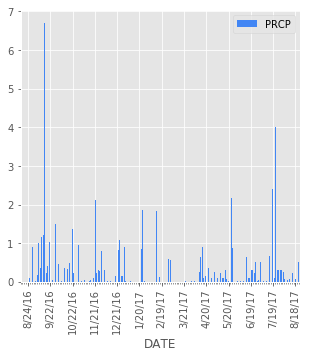

In [14]:
plt.show()

In [15]:
#get data sum
df.sum(axis=0)

PRCP    151.72
dtype: float64

In [16]:
df.sum(axis=1)

DATE
8/23/16    0.70
8/24/16    1.45
8/25/16    0.11
8/26/16    0.01
8/27/16    0.12
8/28/16    2.07
8/29/16    0.90
8/30/16    0.05
8/31/16    2.46
9/1/16     0.01
9/2/16     0.03
9/3/16     1.00
9/4/16     0.44
9/5/16     0.18
9/6/16     1.00
9/7/16     1.35
9/8/16     0.15
9/9/16     0.35
9/10/16    1.16
9/11/16    0.60
9/12/16    1.04
9/13/16    1.20
9/14/16    6.70
9/15/16    3.35
9/16/16    0.61
9/17/16    0.23
9/18/16    0.42
9/19/16    0.25
9/20/16    0.43
9/21/16    1.02
           ... 
7/25/17    0.30
7/26/17    0.30
7/27/17    0.00
7/28/17    0.40
7/29/17    0.30
7/30/17    0.30
7/31/17    0.00
8/1/17     0.00
8/2/17     0.25
8/3/17     0.06
8/4/17     0.00
8/5/17     0.06
8/6/17     0.00
8/7/17     0.05
8/8/17     0.34
8/9/17     0.15
8/10/17    0.07
8/11/17    0.00
8/12/17    0.14
8/13/17    0.00
8/14/17    0.22
8/15/17    0.42
8/16/17    0.42
8/17/17    0.13
8/18/17    0.06
8/19/17    0.09
8/20/17    0.01
8/21/17    0.56
8/22/17    0.50
8/23/17    0.45
Length: 366, dtype:

In [17]:
#Station Analysis
#Get total number of stations
stationcount = session.query(Measurement).distinct(Measurement.STATION).group_by(Measurement.STATION).count()

In [18]:
#Got them
stationcount

9

In [19]:
#Find most active stations
stationactivity = session.query(Measurement.STATION, func.count(Measurement.TOBS))\
.group_by(Measurement.STATION).order_by(func.count(Measurement.TOBS).desc()).all()

In [20]:
stationactivity

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [21]:
#USC00519281 is the most active station

In [22]:
#getting above data for only the last 12 months
tobsdata = session.query(Measurement.STATION, Measurement.TOBS)\
                         .filter(Measurement.ISODATE > '2016-08-22 00:00:00.000000').filter(Measurement.STATION == 'USC00519281').all()

In [23]:
tobsdata

[('USC00519281', 77),
 ('USC00519281', 77),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 75),
 ('USC00519281', 73),
 ('USC00519281', 78),
 ('USC00519281', 77),
 ('USC00519281', 78),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 73),
 ('USC00519281', 74),
 ('USC00519281', 80),
 ('USC00519281', 79),
 ('USC00519281', 77),
 ('USC00519281', 80),
 ('USC00519281', 76),
 ('USC00519281', 79),
 ('USC00519281', 75),
 ('USC00519281', 79),
 ('USC00519281', 78),
 ('USC00519281', 79),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 76),
 ('USC00519281', 74),
 ('USC00519281', 77),
 ('USC00519281', 78),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 77),
 ('USC00519281', 80),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 77),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 75),
 ('USC0051

In [24]:
df = pd.DataFrame(tobsdata, columns=['Station', 'Frequency'])
df

,Station,Frequency
0,USC00519281,77
1,USC00519281,77
2,USC00519281,80
3,USC00519281,80
4,USC00519281,75
5,USC00519281,73
6,USC00519281,78
7,USC00519281,77
8,USC00519281,78
9,USC00519281,80


In [25]:
#Creating the Histogram
plt.figure()

In [26]:
df.plot.hist(bins=12, color='#4286f4')

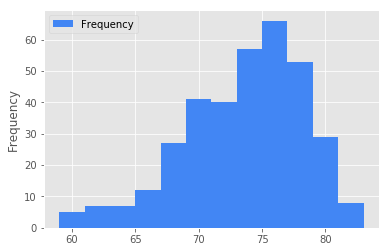

In [27]:
plt.show()

In [28]:
#Temperature Analysis
def calc_temps(startdate, enddate):
    minimum = session.query(func.min(Measurement.TOBS)).filter(Measurement.ISODATE > startdate)\
                             .filter(Measurement.ISODATE < enddate).all()
    maximum = session.query(func.max(Measurement.TOBS)).filter(Measurement.ISODATE > startdate)\
                             .filter(Measurement.ISODATE < enddate).all()
    average = session.query(func.avg(Measurement.TOBS)).filter(Measurement.ISODATE > startdate)\
                             .filter(Measurement.ISODATE < enddate).all()
    return minimum, maximum, average

In [29]:
frame = calc_temps("2016-08-01","2016-08-29")

In [30]:
frame

([(71)], [(84)], [(78.1717791411043)])

In [31]:
df = pd.DataFrame({'min': frame[0][0], 'max': frame[1][0], 'avg': frame[2][0]}, columns=['min','avg','max'])
df

,min,avg,max
0,71,78.171779,84


In [32]:
error = df['max'].sub(df['min'])
df.plot.bar(y='avg',yerr=error)

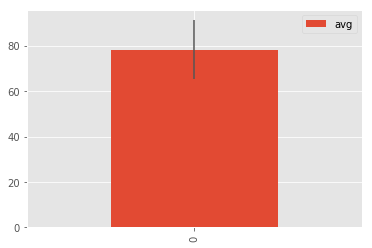

In [33]:
plt.show()

In [37]:
#Flask
from flask import Flask, jsonify

app = Flask(__name__)

In [38]:
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/stations</br>"
        f"/api/v1.0/<start></br>"
        f"/api/v1.0/<start>/<end>"
    )

In [47]:
#query test for app.py
#stations = session.query(Station.STATION, Station.NAME).join("STATION").all()
#doesn't work - no foreign key. will be utilizing distinct

In [42]:
stations

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [48]:
from datetime import datetime

In [49]:
start = '2011-01-03'

In [51]:
date = datetime.strptime(start, '%Y-%m-%d')

In [52]:
date

datetime.datetime(2011, 1, 3, 0, 0)